# Week 2, example 1: Four ways of obtaining Fourier coefficients
In this example we will study four slightly different ways of obtaining Fourier series by numerical integration. All methods will give about the same approximation of the time series $x(t)$, but the value of the Fourier coefficients will be slightly different since different numerical integration methods are used to obtain them

In [202]:
import numpy as np # Import numpy
from matplotlib import pyplot as plt # pyplot module for plotting

## Define waveform
We start by defining a square waveform. We will integrate the waveform over one period, so we only need to define one period of it. We have however plotted several periods to illustrate the behavior of the Fourier series

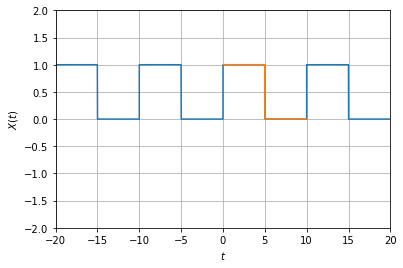

In [203]:
dt = 0.01 # Time step
t = np.array([np.arange(0,10.01,dt)]) # time vector
x = np.zeros(t.shape) # Initialize the x array
x[t<5] = 1.0 # Set the value of x to one for t<5
# Plot waveform
plt.figure()
plt.plot(np.hstack((t[0,:]-20.0,t[0,:]-10.0, t[0,:], t[0,:]+10.0)),np.hstack((x[0,:],x[0,:],x[0,:],x[0,:]))); # Plot four periods
plt.plot(t[0,:],x[0,:]); #Plot one period
plt.ylim(-2, 2);
plt.xlim(-20,20);
plt.grid();
plt.xlabel('$t$');
plt.ylabel('$X(t)$');



## Alternative 1: Obtaining Fourier coefficients by the trapizoidial rule
Here we start with the Fourier series expressed in terms of sinus and cosinus and obtan the coefficients by solving the integral by the trapizoidial rule.

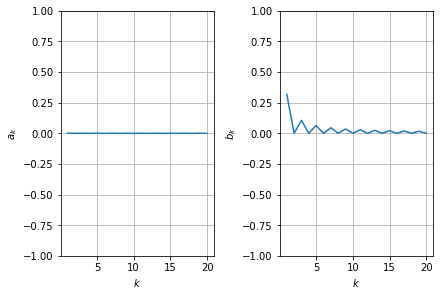

In [204]:
nterms = 20 # Number of Fourier coefficeints
T = np.max(t) # The period of the waveform
a0 = 1/T*np.trapz(x,t) # Mean value
ak = np.zeros((1,nterms))
bk = np.zeros((1,nterms))
for k in range(nterms):
    ak[0,k] = 1/T*np.trapz(x*np.cos(2.0*np.pi*(k+1.0)*t/T),t)
    bk[0,k] = 1/T*np.trapz(x*np.sin(2.0*np.pi*(k+1.0)*t/T),t)

# Plot Fourier coeffecients
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

ax1 = axs[0]
ax1.plot(np.arange(1,nterms+1),ak[0,:])
ax1.set_ylim(-1, 1)
ax1.grid()
ax1.set_ylabel('$a_k$');
ax1.set_xlabel('$k$');

ax2 = axs[1]
ax2.plot(np.arange(1,nterms+1),bk[0,:])
ax2.set_ylim(-1, 1)
ax2.grid()
ax2.set_ylabel('$b_k$');
ax2.set_xlabel('$k$');



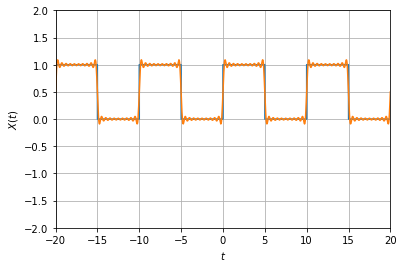

In [205]:
# Plot Fourier series approximation
tp  = np.array([np.linspace(-20,20,1000)])
X_Fourier = np.ones((1,tp.shape[1]))*a0
for k in range(nterms):
    X_Fourier = X_Fourier + 2.0*(ak[0,k]*np.cos(2.0*np.pi*(k+1.0)*tp/T) + bk[0,k]*np.sin(2.0*np.pi*(k+1.0)*tp/T))

plt.figure()
plt.plot(np.hstack((t[0,:]-20.0,t[0,:]-10.0, t[0,:], t[0,:]+10.0)),np.hstack((x[0,:],x[0,:],x[0,:],x[0,:]))); # Plot four periods
plt.plot(tp[0,:],X_Fourier[0,:]);
plt.ylim(-2, 2);
plt.xlim(-20,20);
plt.grid();
plt.xlabel('$t$');
plt.ylabel('$X(t)$');
    

## Alternative 2: Trapezoidal rule, complex Fourier series
This is the same as the example above, but now we use the complex format of the Fourier series, which is essentially only rewriting of the fourmlea used above introducing Eulers formula $e^{i \omega t} = cos(\omega t) + i sin(\omega t)$.

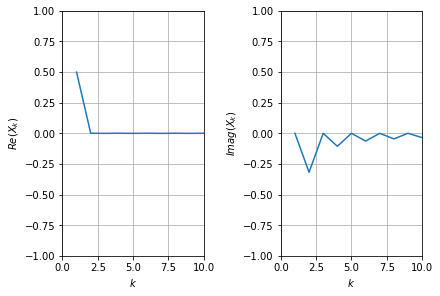

In [206]:
nterms = t.shape[1] # The numer of terms in the Fourier series
Xk = np.zeros((1,nterms),dtype=complex)
for k in range(nterms):
    Xk[0,k] = 1/T*np.trapz(x*np.exp(-1j*2*np.pi/T*k*t),t)

# Plot Fourier coeffecients
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

ax1 = axs[0]
ax1.plot(np.arange(1,nterms+1),np.real(Xk[0,:]))
ax1.set_ylim(-1, 1)
ax1.set_xlim(0, 10)
ax1.grid()
ax1.set_ylabel('$Re(X_k)$');
ax1.set_xlabel('$k$');

ax2 = axs[1]
ax2.plot(np.arange(1,nterms+1),np.imag(Xk[0,:]))
ax2.set_ylim(-1, 1)
ax2.set_xlim(0, 10)
ax2.grid()
ax2.set_ylabel('$Imag(X_k)$');
ax2.set_xlabel('$k$');
    
    
    

## Alternative 3: Left Rectangular Rule, complex Fourier series
This is what is typically implemented in softwares as the descrete Fourier transform

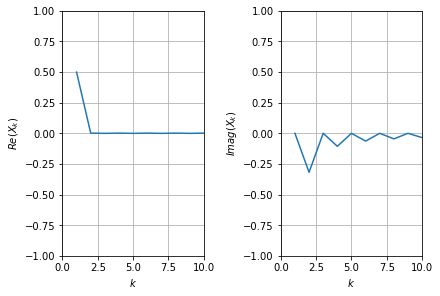

In [212]:
N = t.shape[1] # The numer of terms in the Fourier series
Xk = np.zeros((1,nterms),dtype=complex)
for k in range(N):
    Xk[0,k] = 1/N*np.matmul(x,np.exp(-1j*2*np.pi/N*k*np.arange(N)))

# Plot Fourier coeffecients
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

ax1 = axs[0]
ax1.plot(np.arange(1,nterms+1),np.real(Xk[0,:]))
ax1.set_ylim(-1, 1)
ax1.set_xlim(0, 10)
ax1.grid()
ax1.set_ylabel('$Re(X_k)$');
ax1.set_xlabel('$k$');

ax2 = axs[1]
ax2.plot(np.arange(1,nterms+1),np.imag(Xk[0,:]))
ax2.set_ylim(-1, 1)
ax2.set_xlim(0, 10)
ax2.grid()
ax2.set_ylabel('$Imag(X_k)$');
ax2.set_xlabel('$k$');

## Alternative 4: The fast Fourier transform
The descrete Fourier transform can be implemented in a clever time saving way. This is called the fast Fourier transform and is implemented in many softwares



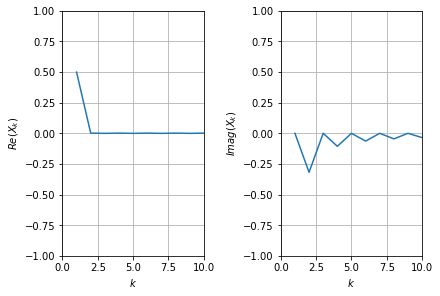

In [216]:
N = t.shape[1] # The numer of terms in the Fourier series
Xk = np.fft.fft(x)/N

# Plot Fourier coeffecients
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

ax1 = axs[0]
ax1.plot(np.arange(1,nterms+1),np.real(Xk[0,:]))
ax1.set_ylim(-1, 1)
ax1.set_xlim(0, 10)
ax1.grid()
ax1.set_ylabel('$Re(X_k)$');
ax1.set_xlabel('$k$');

ax2 = axs[1]
ax2.plot(np.arange(1,nterms+1),np.imag(Xk[0,:]))
ax2.set_ylim(-1, 1)
ax2.set_xlim(0, 10)
ax2.grid()
ax2.set_ylabel('$Imag(X_k)$');
ax2.set_xlabel('$k$');